In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
from sklearn.cluster import KMeans
from sklearn import neighbors

In [27]:
book_df = pd.read_csv('books.csv',on_bad_lines='skip')

In [29]:
book_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [31]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [33]:
book_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<Axes: xlabel='average_rating', ylabel='title'>

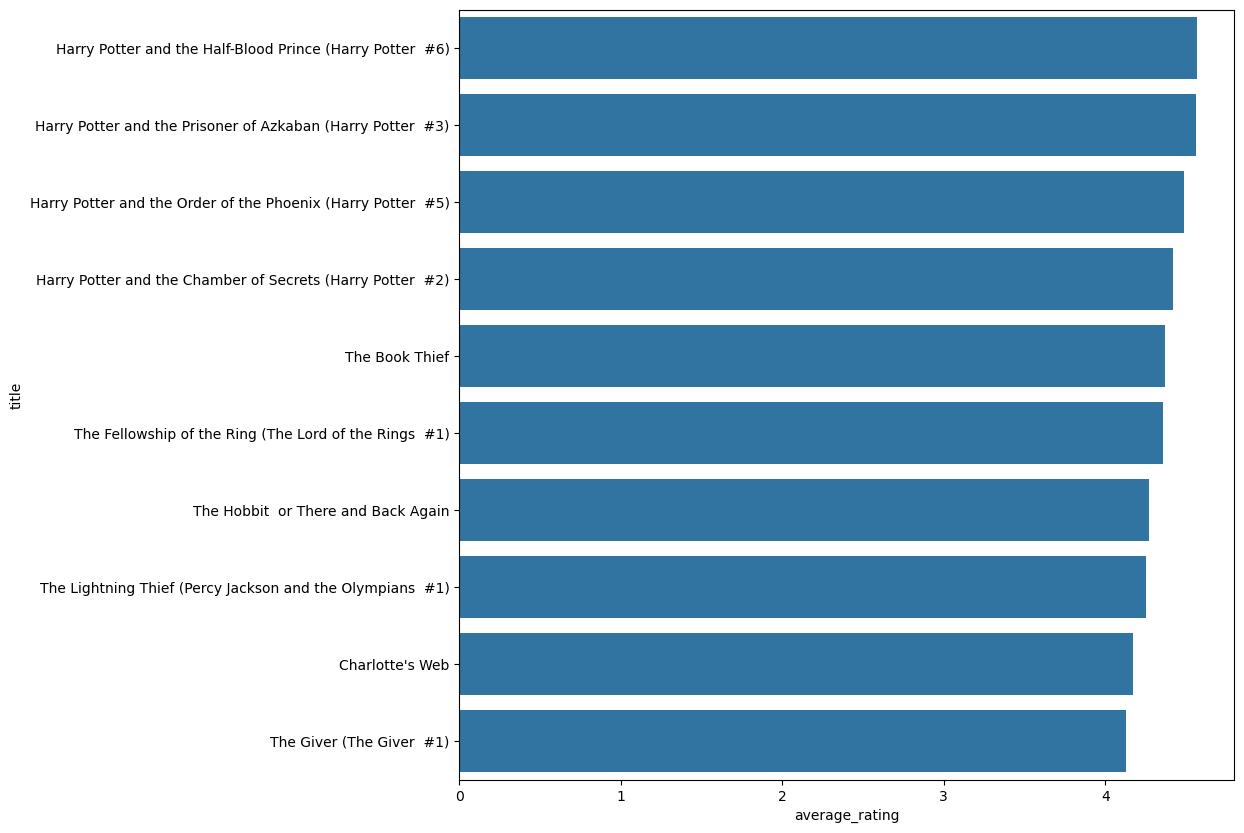

In [35]:
book_top_10 = book_df[book_df["ratings_count"] > 1000000]
book_top_10.sort_values(by="average_rating", ascending=False)
plt.figure(figsize=(10,10))
data = book_top_10.sort_values(by="average_rating", ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data)

In [37]:
author_most_books = book_df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

In [39]:
author_most_books

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


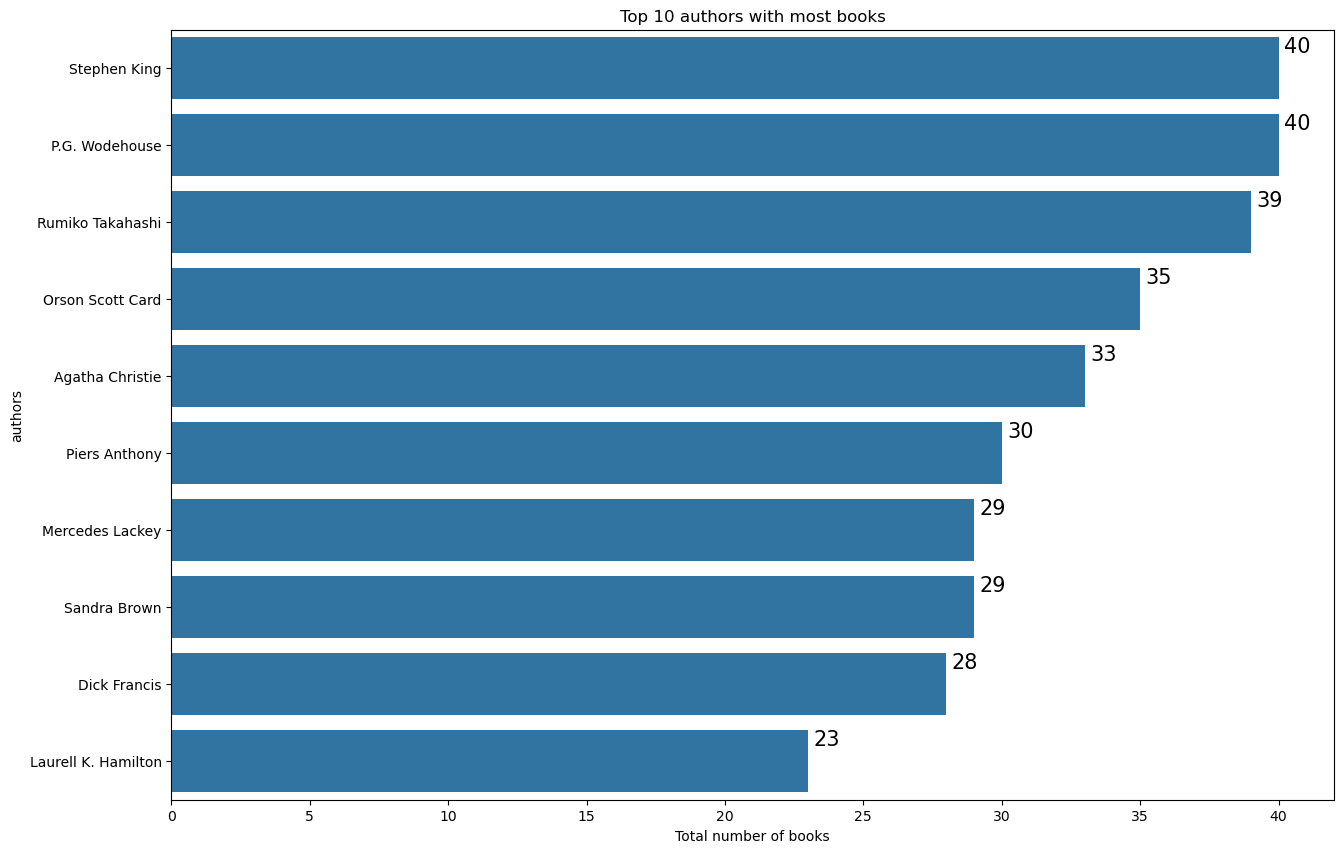

In [43]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = author_most_books["title"],y = author_most_books.index)
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
totals = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15)
plt.show();

In [45]:
book_most_rated = book_df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

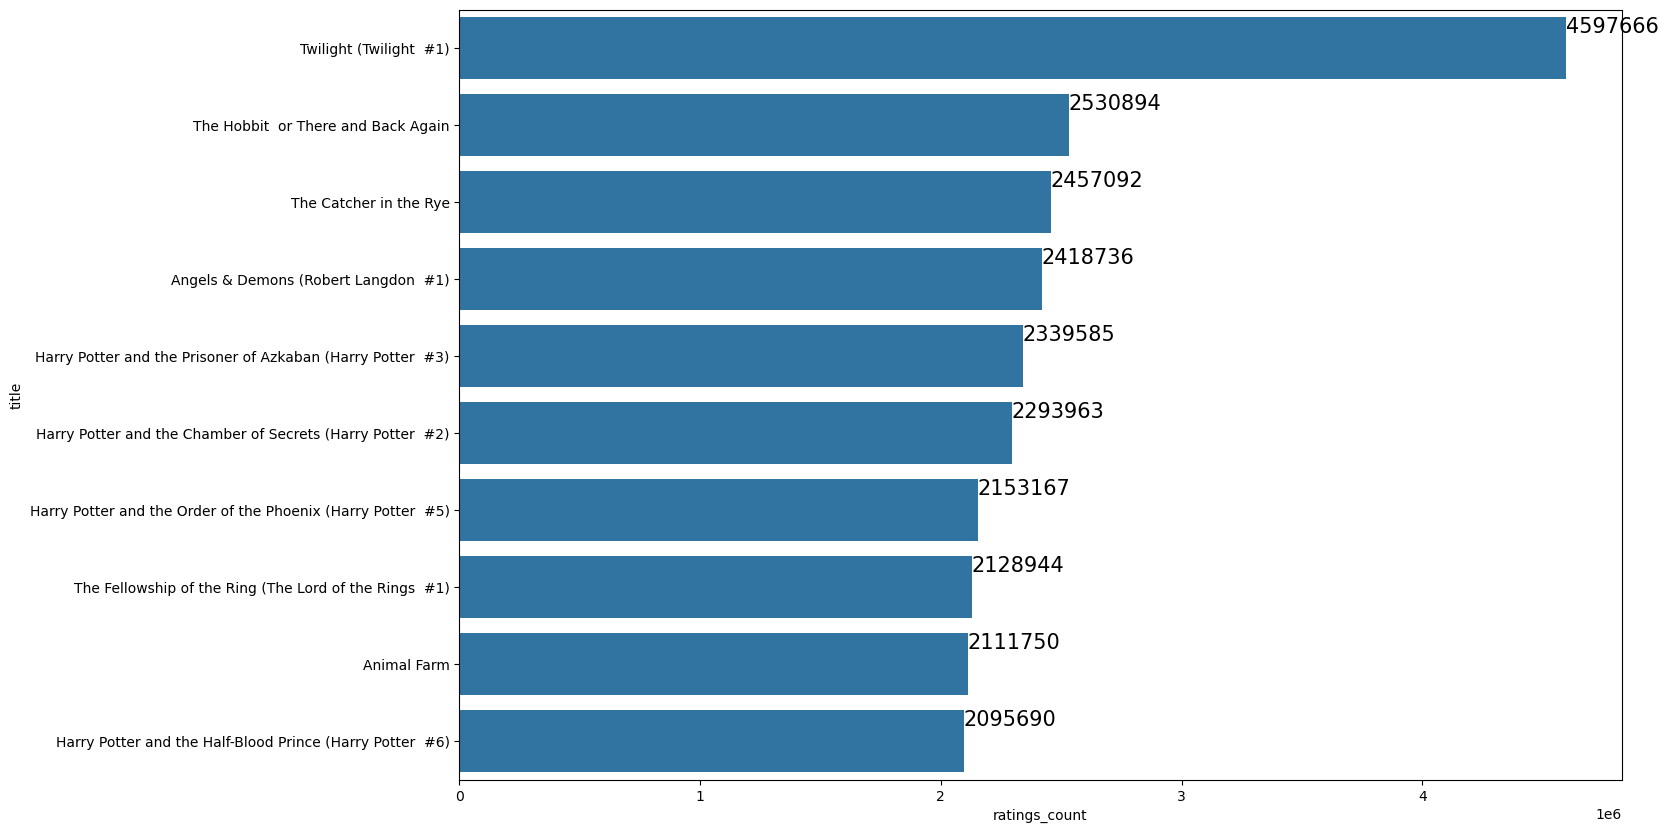

In [49]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = book_most_rated["ratings_count"],y = book_most_rated.index)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())), fontsize=15)

C:\Users\HP\AppData\Local\Temp\ipykernel_11772\1476363610.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(book_df['average_rating'], ax=ax)


Text(0.5, 0, 'Average ratings')

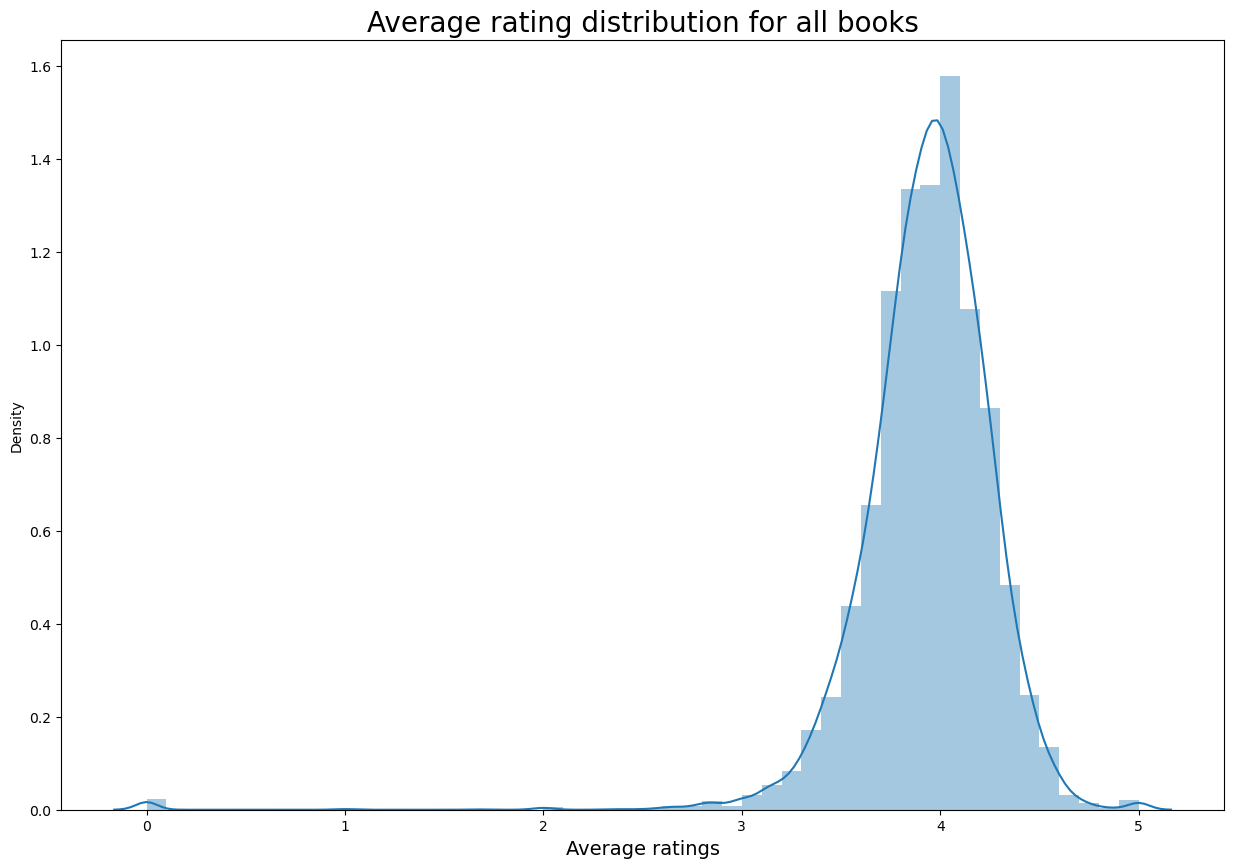

In [55]:
book_df.average_rating = book_df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(book_df['average_rating'], ax=ax)
ax.set_title("Average rating distribution for all books", fontsize=20)
ax.set_xlabel("Average ratings", fontsize=14)

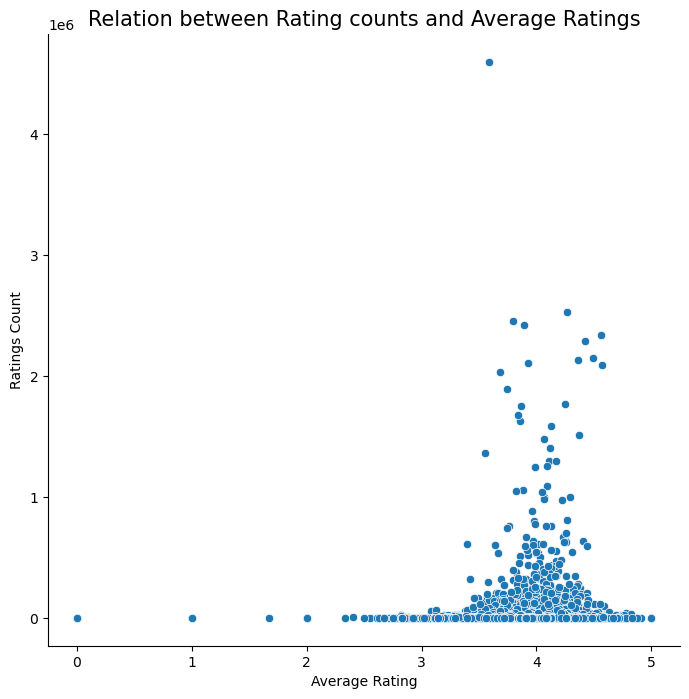

In [57]:
ax = sns.relplot(data=book_df, x="average_rating", y="ratings_count", sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1500x1000 with 0 Axes>

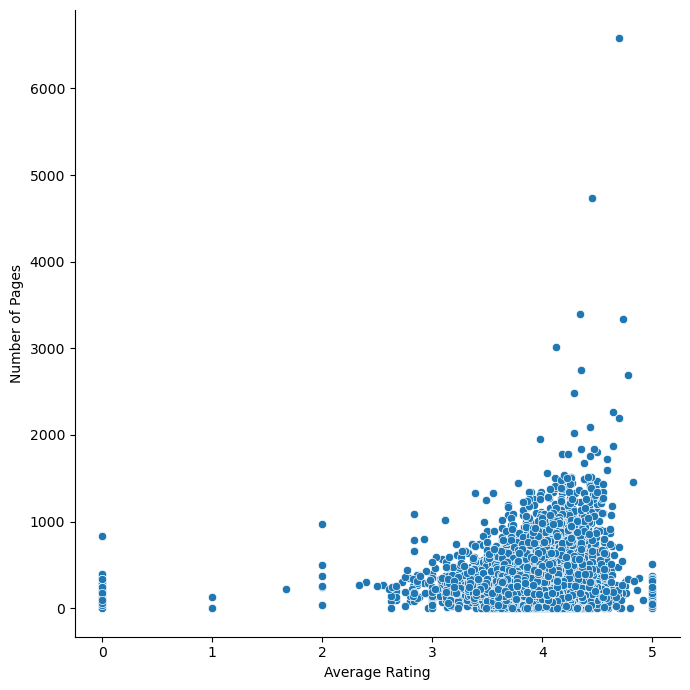

In [59]:

plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = book_df,sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [61]:
df_book = book_df.copy()

In [63]:
df_book.loc[ (df_book['average_rating'] >= 0) & (df_book['average_rating'] <=1), 'rating_between'] = 'between 0 and 1'
df_book.loc[ (df_book['average_rating'] >1) & (df_book['average_rating'] <=2), 'rating_between'] = 'between 1 and 2'
df_book.loc[ (df_book['average_rating'] >2) & (df_book['average_rating'] <=3), 'rating_between'] = 'between 2 and 3'
df_book.loc[ (df_book['average_rating'] >3) & (df_book['average_rating'] <=4), 'rating_between'] = 'between 3 and 4'
df_book.loc[ (df_book['average_rating'] >4) & (df_book['average_rating'] <=5), 'rating_between'] = 'between 4 and 5'

In [65]:
df_book.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


In [67]:
rating_df = pd.get_dummies(df_book['rating_between'])
language_df = pd.get_dummies(df_book['language_code'])

In [69]:
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [71]:
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
features = pd.concat([rating_df, language_df, df_book['average_rating'], df_book['ratings_count']], axis=1)

In [75]:
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.49,2153167
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.42,6333
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.56,2339585
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.78,41428


In [77]:

features = MinMaxScaler().fit_transform(features)

In [79]:
features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

In [81]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [103]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df_book[df_book['title'] ==  book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(book_df.loc[newid].title)
    return book_list_name


In [115]:
BookNames = BookRecommender('Little Women')
BookNames

['Little Women',
 'Jane Eyre',
 'The Giver (The Giver  #1)',
 'Memoirs of a Geisha',
 "Charlotte's Web",
 'Water for Elephants']